<a href="https://colab.research.google.com/github/anumit-web/python-interview-2024/blob/main/machine%20learning/Unsupervised_Learning_clustering_type_iris_flower_clustering_Gaussian_mixture_model_(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python interview preparation

# Machine Learning

# Supervised Learning

# Support Vector Machines (SVM)

# Chapter 1

---

---

# Python Code

In [113]:
import numpy as np
import pandas as pd

In [114]:
import matplotlib.pyplot as plt

In [115]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [117]:
import sys

print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [118]:
print("Hello, World!")

Hello, World!


# Python code

In [119]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://kirenz.github.io/classification/_images/iris.png")

# Load dataset

In [120]:
iris = datasets.load_iris() #Loading the dataset

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# Converting to Pandas Data Frame

In [121]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [122]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [123]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


# Plotting the dataset

## Scatter plot

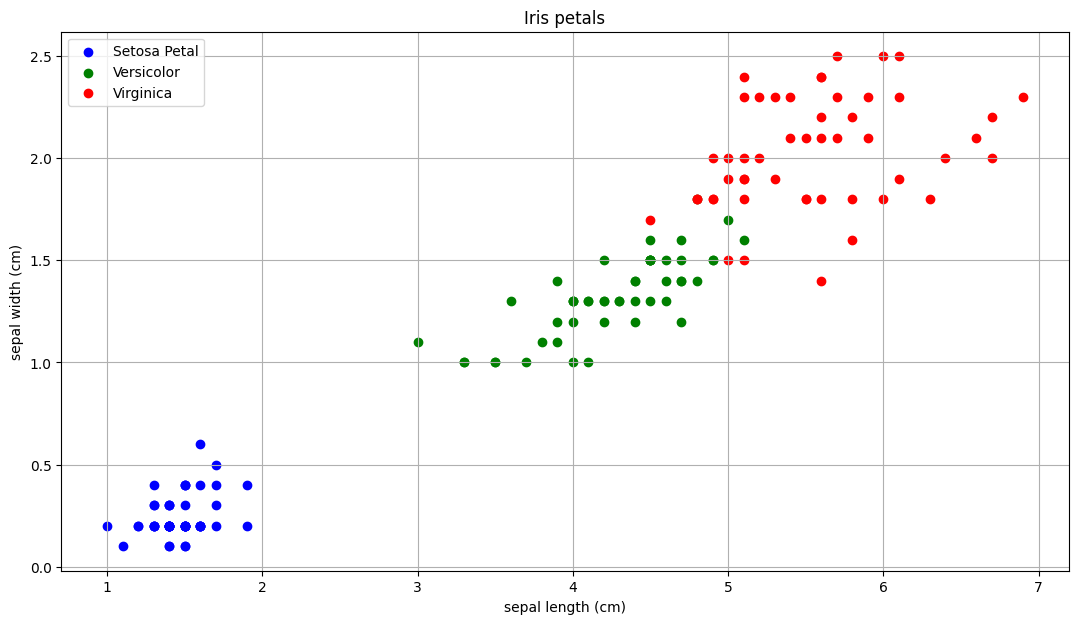

In [124]:

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

# Performing Classification using SVC

In [125]:
from sklearn.model_selection import train_test_split

X = iris.drop(['sepal length (cm)', 'sepal width (cm)', 'target', 'species'], axis=1)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

In [126]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))
    print(format(accuracy_score(pred, y_test), ".0%"))


Accuracy using linear: 0.9518072289156626
95%
Accuracy using rbf: 0.9879518072289156
99%
Accuracy using poly: 1.0
100%
